In [5]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np



# Loading the data 

In [6]:
labels = ['cats', 'dogs']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
data_dir_test="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/train"
data_dir_val="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/test"
train=get_data(data_dir_test)
print(len(train))
val=get_data(data_dir_val)
print(len(val))

90
30


# Visualize the data 

In [ ]:
import random
#random.shuffle(train)
#random.shuffle(val)
for sample in val[:30]:
    print(sample[1])

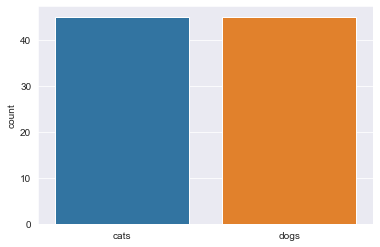

In [7]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("cats")
    else:
        l.append("dogs")
sns.set_style('darkgrid')
sns.countplot(l)


Text(0.5, 1.0, 'dogs')

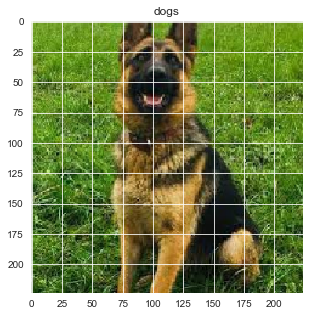

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[46][0])
plt.title(labels[train[46][1]])

Text(0.5, 1.0, 'dogs')

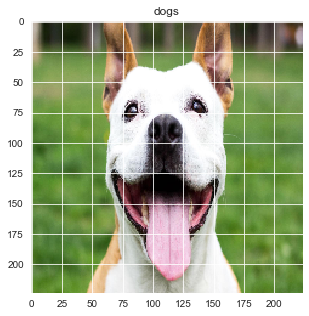

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

# Data Preprocessing

In [8]:

x_train =[]
y_train =[]
x_val =[]
y_val =[]

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)



In [16]:
import pickle

pickle_out = open("x_data_images","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_data_images.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


# Define the Model 

# 1- binary classification

In [9]:

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

In [10]:
model.summary()
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)       

In [11]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))
model.save('cats_dogs.model')


Train on 90 samples, validate on 30 samples
Epoch 1/10
90/90 [==============================] - 5s 51ms/step - loss: 0.6957 - accuracy: 0.3333 - val_loss: 0.6944 - val_accuracy: 0.0667
Epoch 2/10
90/90 [==============================] - 4s 45ms/step - loss: 0.6955 - accuracy: 0.4111 - val_loss: 0.6931 - val_accuracy: 0.1333
Epoch 3/10
90/90 [==============================] - 4s 46ms/step - loss: 0.6925 - accuracy: 0.4667 - val_loss: 0.6919 - val_accuracy: 0.3000
Epoch 4/10
90/90 [==============================] - 4s 48ms/step - loss: 0.6898 - accuracy: 0.5333 - val_loss: 0.6909 - val_accuracy: 0.3667
Epoch 5/10
90/90 [==============================] - 5s 56ms/step - loss: 0.6979 - accuracy: 0.4444 - val_loss: 0.6899 - val_accuracy: 0.5333
Epoch 6/10
90/90 [==============================] - 5s 54ms/step - loss: 0.6936 - accuracy: 0.5778 - val_loss: 0.6891 - val_accuracy: 0.6667
Epoch 7/10
90/90 [==============================] - 4s 50ms/step - loss: 0.6887 - accuracy: 0.6333 - val_loss

In [12]:
#Evaluating the result
val_loss,val_acc=model.evaluate(x_val,y_val)
print(val_loss)
print(val_acc)

30/30 [==============================] - 0s 11ms/step
0.686288058757782
0.8666666746139526


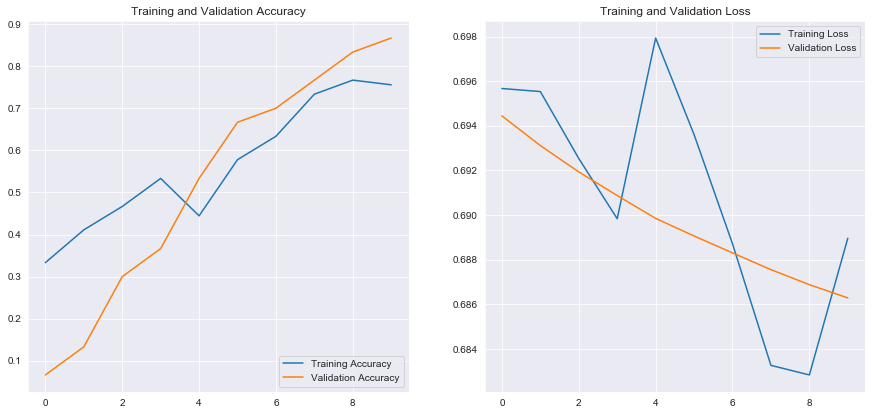

In [18]:
#with plots
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['cats (Class 0)','dogs (Class 1)']))

                precision    recall  f1-score   support

cats (Class 0)       0.58      1.00      0.73        15
dogs (Class 1)       1.00      0.27      0.42        15

      accuracy                           0.63        30
     macro avg       0.79      0.63      0.58        30
  weighted avg       0.79      0.63      0.58        30



# Prediction

In [20]:
import pandas as pd
import sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


In [26]:
X_app,X_test,y_app,y_test = train_test_split(x_train,y_train,test_size = 10,random_state=0)
print(X_app.shape,X_test.shape,y_app.shape,y_test.shape)


(80, 224, 224, 3) (10, 224, 224, 3) (80,) (10,)


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#modele = lr.fit(x_train,y_train)
y_train.shape

(90,)

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
GATEGORIES=["cats","dogs"]
def prepare(filepath):
    IMG_SIZE = 224  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.
model=tf.keras.models.load_model('cats_dogs.model')
prediction=model.predict(prepare('cat1.jpg'))
print(prediction)

# 2- Binary classification

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory('C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/train',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=train.flow_from_directory('C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/test',target_size=(200,200),batch_size=3,class_mode='binary')

Found 90 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [22]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [24]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [25]:
opt = keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt ,metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
model_fit=model.fit(train_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
30/30 [==============================] - 17s 576ms/step - loss: 1.5388 - accuracy: 0.5222 - val_loss: 0.1499 - val_accuracy: 0.5000
Epoch 2/20
30/30 [==============================] - 16s 542ms/step - loss: 0.7692 - accuracy: 0.7222 - val_loss: 0.5662 - val_accuracy: 0.6667
Epoch 3/20
30/30 [==============================] - 17s 565ms/step - loss: 0.6472 - accuracy: 0.7556 - val_loss: 0.2301 - val_accuracy: 0.8667
Epoch 4/20
30/30 [==============================] - 18s 614ms/step - loss: 0.5306 - accuracy: 0.8111 - val_loss: 0.4460 - val_accuracy: 0.9333
Epoch 5/20
30/30 [==============================] - 14s 474ms/step - loss: 0.2871 - accuracy: 0.9000 - val_loss: 0.0673 - val_accuracy: 0.8000
Epoch 6/20
30/30 [==============================] - 12s 394ms/step - loss: 0.2164 - accuracy: 0.9111 - val_loss: 0.3369 - val_accuracy: 0.8333
Epoch 7/20
30/30 [==============================] - 11s 363ms/step - loss: 0.1047 - accuracy: 0.9556 - val_loss: 0.2376 - val_accuracy: 0.8333

In [149]:
validation_dataset.class_indices

{'cats': 0, 'dogs': 1}

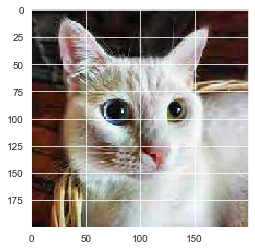

Cat


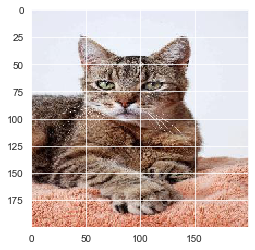

Cat


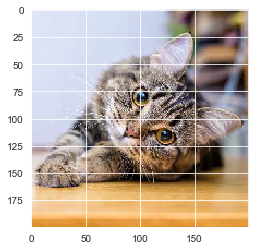

Cat


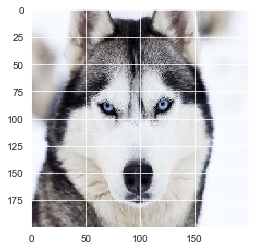

Dog


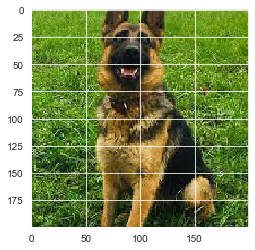

Dog


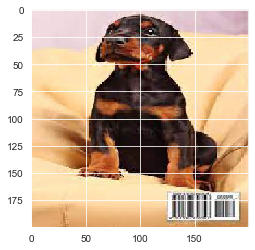

Dog


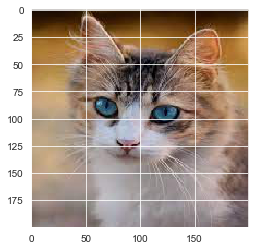

Cat


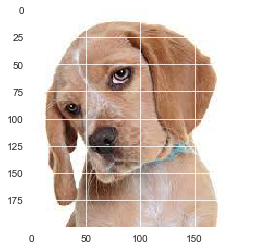

Dog


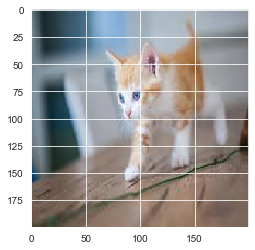

Cat


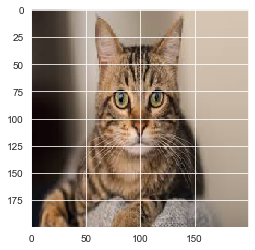

Cat


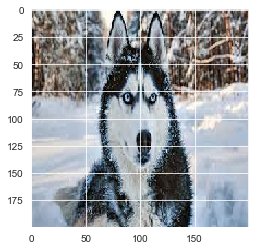

Dog


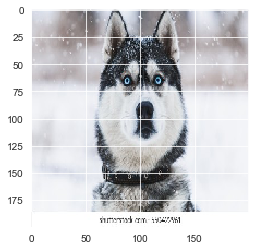

Dog


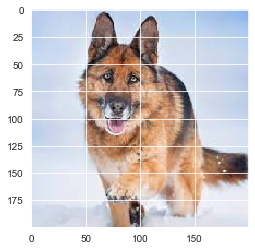

Dog


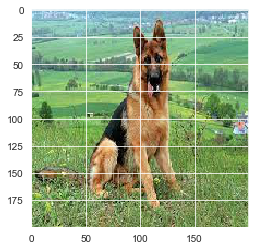

Dog


In [33]:
dir_path="C:/Users/bilel/OneDrive/Documents/Documents/Dauphine/2021/sems1/python/Data_Augmentation/val"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val==0 :
        print("Cat")
    else:
        print("Dog")

In [28]:
val_loss, val_acc = model.evaluate(validation_dataset)
print(val_loss)
print(val_acc)

10/10 [==============================] - 1s 73ms/step
0.38312825560569763
0.8666666746139526
